<a href="https://colab.research.google.com/github/WyvernCore/ICS3206---Machine-Learning-Expert-Systems-and-Fuzzy-Logic/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree

### Uploading csv file to Google Colab

In [112]:
from google.colab import files 
uploaded = files.upload() #Used to upload csv file into Google Colab session

Saving voice.csv to voice (3).csv


### Checking CSV file contents

In [113]:
df = pd.read_csv('voice.csv') #loading the csv file using panda

In [114]:
df.head() #checking the head of the csv file

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


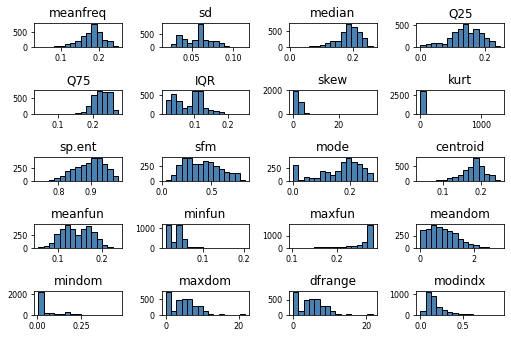

In [115]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

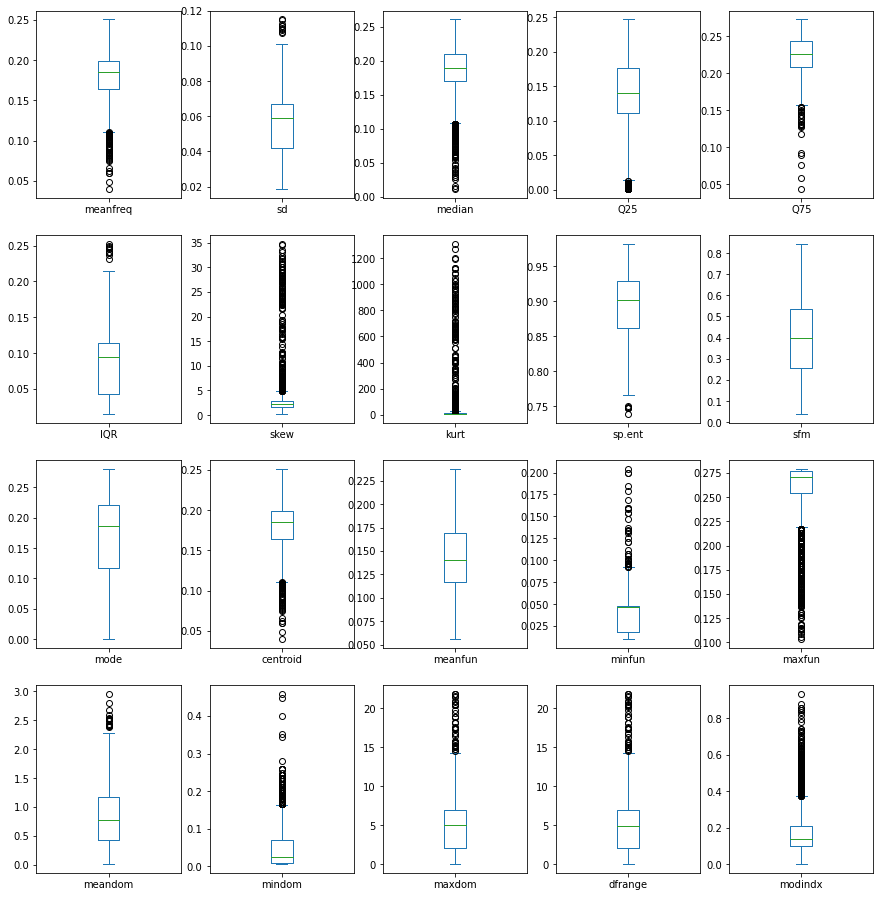

In [116]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,20));

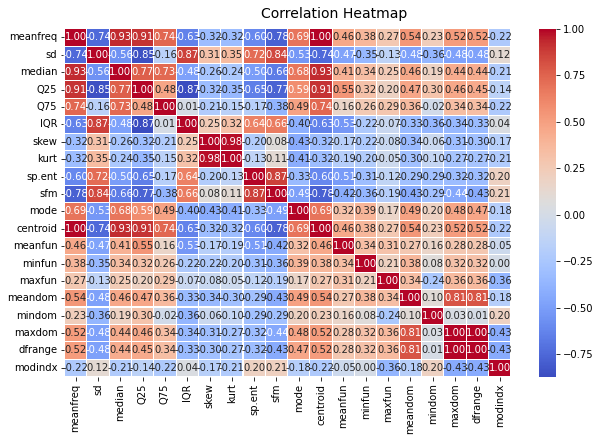

In [117]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

In [118]:
df.dtypes == 'object'
num_vars = df.columns[df.dtypes != 'object']
print(num_vars)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')


In [125]:
y = df.label #get the label of each row 
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [130]:
scaler = StandardScaler()
x = df.iloc[:,:-1]
y = df.label #get the label of each row 

df_scaled = scaler.fit_transform(x.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=num_vars)
df_scaled = df_scaled.assign(label=y.values)
df_scaled.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,male
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,male
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,male
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,male
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046,male


In [153]:
df2 = df_scaled.drop(columns=["kurt", "skew"])

In [154]:
def unique(col):
   return df2[col].nunique() #return count number of distinct elements in specified axis

TotalUnique = {} #create a dict to store the total amount of unique elements in csv ex label 2 {male, female}
for i in df2.columns:
    value = unique(i)
    TotalUnique [i] = value

for key,value in TotalUnique.items():
    print(key, value)

meanfreq 3166
sd 3166
median 3077
Q25 3103
Q75 3034
IQR 3073
sp.ent 3166
sfm 3166
mode 2825
centroid 3166
meanfun 3166
minfun 913
maxfun 123
meandom 2999
mindom 77
maxdom 1054
dfrange 1091
modindx 3079
label 2


In [155]:
df2['label'].value_counts() #print the amount of rows for the two designated labels 

male      1584
female    1584
Name: label, dtype: int64

In [156]:
df2.dtypes == 'object'
num_vars = df2.columns[df2.dtypes != 'object']

In [157]:
df2[num_vars].isnull().sum() #Checking for any missing data within dataset

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
dtype: int64

In [158]:
x = df2.iloc[:,:-1]
print(x) #get each value of each row without excluding the label

y = df2.label #get the label of each row 
print(y)

      meanfreq        sd    median       Q25       Q75       IQR    sp.ent  \
0    -4.049248  0.427355 -4.224901 -2.576102 -5.693607 -0.214778 -0.039083   
1    -3.841053  0.611669 -3.999293 -2.486885 -5.588987 -0.258485 -0.065236   
2    -3.463066  1.603848 -4.095851 -2.706986 -3.928699  0.909326 -1.083730   
3    -0.992157  0.899998 -0.759454 -0.901418 -0.711205  0.632690  1.516383   
4    -1.530640  1.322561 -1.676948 -1.268395 -0.792029  1.005588  1.708336   
...        ...       ...       ...       ...       ...       ...       ...   
3163 -1.638842  1.658182 -0.877839 -1.873163 -0.999378  1.579141  1.507749   
3164 -2.162452  1.927682 -2.994482 -2.008095 -0.840021  1.820721  1.458418   
3165 -1.298773  2.322724 -0.051973 -2.199039 -0.017123  2.492666  1.150198   
3166 -1.245202  2.012196 -0.017728 -1.991852 -0.204021  2.153653  1.229850   
3167 -0.514746  2.147651 -0.070879 -1.446089  1.102679  2.254671  0.971759   

           sfm      mode  centroid   meanfun    minfun    maxfu

### Splitting data into training and testing (67% Training, 33% Testing)

In [159]:
( x_train, 
  x_test,
  y_train,
  y_test  ) = train_test_split(x,y,test_size=0.33) #Using sk learn to split into 80% training and 20% testing

In [160]:
y_train.value_counts() #labels for training

female    1087
male      1035
Name: label, dtype: int64

In [161]:
y_test.value_counts() #labels for testing

male      549
female    497
Name: label, dtype: int64

In [162]:
def TuneParam(myGrid, myModel, x , y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  grid_search = GridSearchCV(estimator=myModel, param_grid=myGrid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
  grid_result = grid_search.fit(x, y)

  # summarize results
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
  return grid_result.best_params_

### Decision Tree Classifier

In [163]:
modelDTC = DecisionTreeClassifier() #creating the DTC class
modelDTC.fit(x_train,y_train) #fitting the model with the values and labels 

DecisionTreeClassifier()

In [164]:
modelDTC.get_params() #get the default paramaters 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

List of paramaters:

1.   max_depth -> How deep the tree can be
2.   criterion -> Function to measure quality of split either Gini or Entropy 
3.   splitter -> Strategy to choose split of each node to be either the best or random
4.   max_features -> number of features to consider each time to make the split decision
5.   random_state -> Controls the randomness of the estimator
6.   class_weight -> determines the weight (importance of a label)
7.   ccp_alpha -> Pruning of tree



In [165]:
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_features = ['auto', 'sqrt', 'log2']
max_depth = [3, 5, 7, 9]
ccp_alpha = [0.001, 0.01, 0.1]

grid = dict(criterion=criterion ,max_features=max_features, max_depth=max_depth, ccp_alpha=ccp_alpha )
DTCParams = TuneParam(grid, modelDTC, x , y)

Best: 0.962961 using {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2'}
0.901828 (0.047833) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto'}
0.907825 (0.044577) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt'}
0.922431 (0.045640) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2'}
0.948230 (0.022228) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}
0.944224 (0.021852) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}
0.948541 (0.022522) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}
0.956334 (0.015201) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}
0.958651 (0.011895) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}
0.957177 (0.012641) with: {'cc

In [166]:
modelDTC = DecisionTreeClassifier(**DTCParams) #creating the DTC class with hyperparamas
#modelDTC = DecisionTreeClassifier(ccp_alpha = 0.001, criterion = 'entropy', max_depth = 9, max_features = 'log2')
modelDTC.fit(x_train,y_train) #fitting the model with the values and labels 

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2')

In [167]:
predictions = modelDTC.predict(x_test)
predictions #models predictions for each row

array(['male', 'male', 'male', ..., 'female', 'male', 'male'],
      dtype=object)

In [168]:
probabilityPredict = modelDTC.predict_proba(x_test) #Predict the probability of each label
probabilityPredict #Since no early stopping is met then probabities are full

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

DTC Evaluation

In [169]:
pd.crosstab(predictions,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

confusion,female,male,All
matrix,,,
female,473,19,492
male,24,530,554
All,497,549,1046


In [170]:
print("\t\t\tDecision Tree Class report:\n", classification_report(predictions,y_test)) #Printing the DTC's Precision, Recall and f1-score

			Decision Tree Class report:
               precision    recall  f1-score   support

      female       0.95      0.96      0.96       492
        male       0.97      0.96      0.96       554

    accuracy                           0.96      1046
   macro avg       0.96      0.96      0.96      1046
weighted avg       0.96      0.96      0.96      1046



In [171]:
print("Decision Tree Accuracy score: ", accuracy_score(predictions,y_test)*100,"%") #Printing DTC's accuracy score

Decision Tree Accuracy score:  95.88910133843213 %


In [172]:
feature_names = df2.columns[:-1] #features names excluding labels
feature_names

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'sp.ent', 'sfm',
       'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom',
       'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [173]:
feature_importance = pd.DataFrame(modelDTC.feature_importances_, index=feature_names).sort_values(by=[0], ascending=False) #Give feature importance with the highest being the most important 
feature_importance

,0
meanfun,0.787813
IQR,0.042247
sd,0.038329
Q25,0.028742
minfun,0.020320
mindom,0.013394
mode,0.010215
dfrange,0.009489
median,0.009481
sfm,0.009425


In [79]:
features = list(feature_importance[feature_importance[0]>0].index) #Which features dont have an importance of zero
features

['IQR',
 'meanfun',
 'sfm',
 'Q25',
 'meanfreq',
 'mode',
 'modindx',
 'minfun',
 'dfrange',
 'median',
 'Q75']

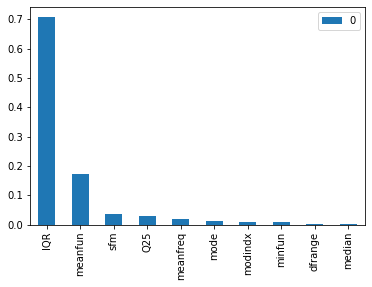

In [80]:
feature_importance.head(10).plot(kind='bar') #Bar chart with importance of features

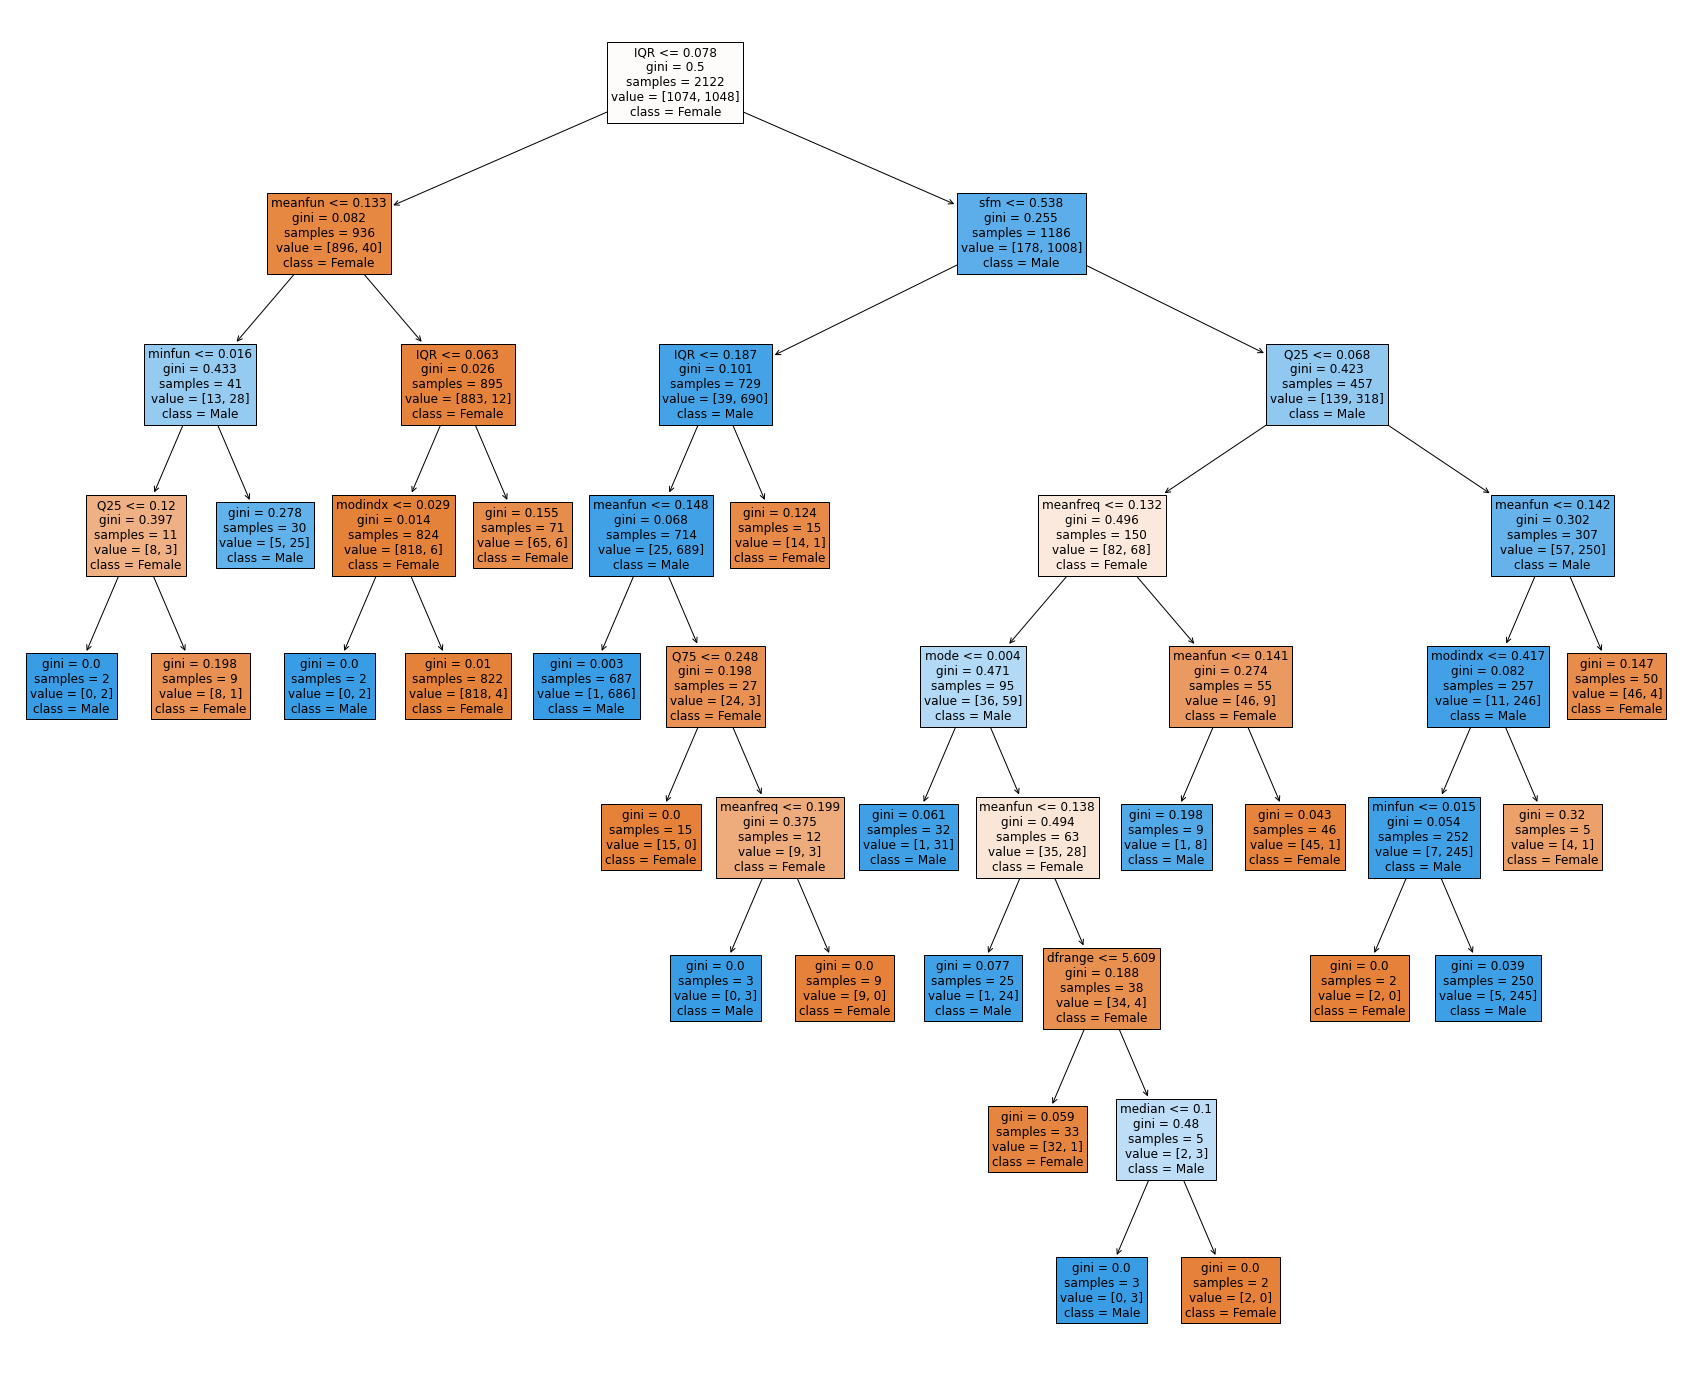

In [81]:
fig = plt.figure(figsize=(30,25)) #Plotting the Decision Tree
_ = tree.plot_tree(modelDTC,
                   feature_names=feature_names,
                   class_names={0:'Female', 1:'Male'},
                   filled=True,
                   fontsize=12
                  )

### Logistic Regression

In [ ]:
modelLR = LogisticRegression() #creating the LR class with hyperparamas
modelLR.fit(x_train,y_train) #fitting the model with the values and labels

In [84]:
modelLR.get_params() #get the default paramaters 

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [86]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iter = [10, 100, 1000, 10000]

grid = dict(solver=solvers,C=c_values,max_iter=max_iter)
LRParams = TuneParam(grid, modelLR, x , y)

Best: 0.969592 using {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
0.957805 (0.009137) with: {'C': 100, 'max_iter': 10, 'solver': 'newton-cg'}
0.606583 (0.033300) with: {'C': 100, 'max_iter': 10, 'solver': 'lbfgs'}
0.967277 (0.006491) with: {'C': 100, 'max_iter': 10, 'solver': 'liblinear'}
0.969382 (0.006524) with: {'C': 100, 'max_iter': 100, 'solver': 'newton-cg'}
0.969381 (0.006476) with: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}
0.969592 (0.006232) with: {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
0.969382 (0.006524) with: {'C': 100, 'max_iter': 1000, 'solver': 'newton-cg'}
0.969382 (0.006524) with: {'C': 100, 'max_iter': 1000, 'solver': 'lbfgs'}
0.969592 (0.006232) with: {'C': 100, 'max_iter': 1000, 'solver': 'liblinear'}
0.969382 (0.006524) with: {'C': 100, 'max_iter': 10000, 'solver': 'newton-cg'}
0.969382 (0.006524) with: {'C': 100, 'max_iter': 10000, 'solver': 'lbfgs'}
0.969592 (0.006232) with: {'C': 100, 'max_iter': 10000, 'solver': 'liblinear'}
0.954336 (0.01

In [92]:
modelLR = LogisticRegression(**LRParams) #creating the LR class with hyperparamas
modelLR.fit(x_train,y_train) #fitting the model with the values and labels

LogisticRegression(C=100, solver='liblinear')

In [93]:
predictionsLR = modelLR.predict(x_test)
predictionsLR #models predictions for each row

array(['female', 'male', 'male', ..., 'male', 'female', 'male'],
      dtype=object)

### LR Evaluation

In [94]:
pd.crosstab(predictionsLR,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

confusion,female,male,All
matrix,,,
female,488,11,499
male,22,525,547
All,510,536,1046


In [95]:
print("\t\t\tLog Reg Class report:\n",classification_report(predictionsLR,y_test))

			Log Reg Class report:
               precision    recall  f1-score   support

      female       0.96      0.98      0.97       499
        male       0.98      0.96      0.97       547

    accuracy                           0.97      1046
   macro avg       0.97      0.97      0.97      1046
weighted avg       0.97      0.97      0.97      1046



In [96]:
print("Log Reg Accuracy score: ",accuracy_score(predictionsLR,y_test)*100,"%")

Log Reg Accuracy score:  96.84512428298278 %


### Support Vector Machine (SVM)

In [97]:
modelSVM = SVC()
modelSVM.fit(x_train,y_train) #fitting the model with the values and labels

SVC()

In [98]:
modelSVM.get_params() #get the default paramaters 

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [99]:
kernel = ['poly', 'rbf', 'sigmoid', 'linear']
C = [50, 10, 1.0, 0.1, 0.01]
#gamma = ['scale']
gamma = [1,0.1,0.01,0.001]
grid = dict(kernel=kernel,C=C,gamma=gamma)

SVMParams = TuneParam(grid, modelSVM, x_train , y_train)

KeyboardInterrupt: ignored

In [ ]:
modelSVM = LogisticRegression(**SVMParams) #creating the LR class with hyperparamas
modelSVM.fit(x_train,y_train) #fitting the model with the values and labels

In [ ]:
predictionsSVM = modelSVM.predict(x_test)
predictionsSVM #models predictions for each row



### SVM Evaluation


In [ ]:
pd.crosstab(predictionsSVM,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

In [ ]:
print("\t\t\tSVM Class report:\n",classification_report(predictionsSVM,y_test))

In [ ]:
print("SVM score: ",accuracy_score(predictionsSVM,y_test)*100,"%")

### K-Means Clustering 

In [215]:
mapping = {'male':1, 'female':0}
y_kmc_train = y_train.map(mapping)
y_kms_test = y_test.map(mapping)

modelKMC = KMeans(n_clusters=2)
modelKMC.fit(x_train,y_kmc_train) #fitting the model with the values and labels

<bound method NDFrame.head of 1853    0
100     1
1720    0
2304    0
2655    0
       ..
2346    0
721     1
79      1
1864    0
1635    0
Name: label, Length: 2122, dtype: int64>


KMeans(n_clusters=2)

In [216]:
predictionsKMC = modelKMC.predict(x_test)
predictionsKMC #models predictions for each row

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [217]:
modelKMC.get_params() #get the default paramaters 

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [251]:
max_iter = [300, 500, 600, 800, 1000, 2000]
algorithm = ["full", "elkan"]

grid = dict(max_iter = max_iter, algorithm=algorithm)
y_kmc= y.map(mapping)
KMCParams = TuneParam(grid, modelKMC, x , y_kmc)

Best: 0.543533 using {'algorithm': 'elkan', 'max_iter': 600}
0.501403 (0.146254) with: {'algorithm': 'full', 'max_iter': 300}
0.525394 (0.143925) with: {'algorithm': 'full', 'max_iter': 500}
0.506925 (0.146029) with: {'algorithm': 'full', 'max_iter': 600}
0.499333 (0.146128) with: {'algorithm': 'full', 'max_iter': 800}
0.453402 (0.138355) with: {'algorithm': 'full', 'max_iter': 1000}
0.499634 (0.146238) with: {'algorithm': 'full', 'max_iter': 2000}
0.541012 (0.140429) with: {'algorithm': 'elkan', 'max_iter': 300}
0.505574 (0.146274) with: {'algorithm': 'elkan', 'max_iter': 500}
0.543533 (0.139131) with: {'algorithm': 'elkan', 'max_iter': 600}
0.522836 (0.144529) with: {'algorithm': 'elkan', 'max_iter': 800}
0.492080 (0.146166) with: {'algorithm': 'elkan', 'max_iter': 1000}
0.475273 (0.144020) with: {'algorithm': 'elkan', 'max_iter': 2000}


In [252]:
modelKMC =  KMeans(n_clusters=2, **KMCParams) #creating the LR class with hyperparamas
modelKMC.fit(x_train,y_kmc_train) #fitting the model with the values and labels

KMeans(algorithm='elkan', max_iter=600, n_clusters=2)

In [253]:
predictionsKMC = modelKMC.predict(x_test)
predictionsKMC #models predictions for each row

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [254]:
pd.crosstab(predictionsKMC,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

confusion,female,male,All
matrix,,,
0,355,230,585
1,142,319,461
All,497,549,1046


In [255]:
print("\t\t\tKMC Class report:\n",classification_report(predictionsKMC,y_kms_test))

			KMC Class report:
               precision    recall  f1-score   support

           0       0.71      0.61      0.66       585
           1       0.58      0.69      0.63       461

    accuracy                           0.64      1046
   macro avg       0.65      0.65      0.64      1046
weighted avg       0.66      0.64      0.65      1046



In [256]:
print("KMC score: ", accuracy_score(predictionsKMC,y_kms_test)*100,"%")

KMC score:  64.43594646271511 %


Artificial Neural Network

In [257]:
modelANN = MLPClassifier() 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [259]:
modelANN.get_params() #get the default paramaters 

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
activation = ['tanh', 'relu']
learning_rate = ['constant', 'adaptive']
n_iter_no_change = [10, 30, 50, 100]
grid = dict(max_iter = [2000], early_stopping = [True], activation=activation, learning_rate=learning_rate, n_iter_no_change=n_iter_no_change)
ANNParams = TuneParam(grid, modelANN, x.values , y)

In [283]:
modelANN = MLPClassifier(**ANNParams)

modelANN.fit(x_train.values ,y_train)  

MLPClassifier(early_stopping=True, learning_rate='adaptive', max_iter=2000)

In [285]:
predictionsANN = modelANN.predict(x_test)
predictionsANN #models predictions for each row

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


array(['male', 'male', 'male', ..., 'female', 'male', 'male'], dtype='<U6')

In [286]:
pd.crosstab(predictionsANN,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

confusion,female,male,All
matrix,,,
female,477,10,487
male,20,539,559
All,497,549,1046


In [287]:
print("\t\t\tANN Class report:\n",classification_report(predictionsANN,y_test))

			ANN Class report:
               precision    recall  f1-score   support

      female       0.96      0.98      0.97       487
        male       0.98      0.96      0.97       559

    accuracy                           0.97      1046
   macro avg       0.97      0.97      0.97      1046
weighted avg       0.97      0.97      0.97      1046



In [288]:
print("ANN score: ", accuracy_score(predictionsANN, y_test)*100,"%")

ANN score:  97.131931166348 %


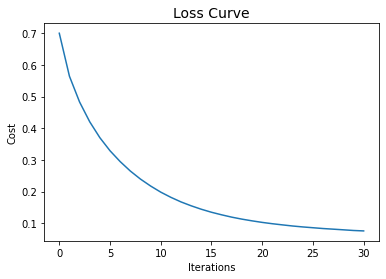

In [289]:
plt.plot(modelANN.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()